In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [54]:
#CODE to import the train csv file
data = pd.read_csv(r'C:\Users\Vaseekaran.AMIRTHAVARMAN\Desktop\Datastorm\Datasets\credit_card_default_train.csv', header=0)
data = data.dropna()
print(data.shape)
print(list(data.columns))

print()

test_data = pd.read_csv(r'C:\Users\Vaseekaran.AMIRTHAVARMAN\Desktop\Datastorm\Datasets\credit_card_default_test.csv', header=0)
test_data=test_data.dropna()
print(test_data.shape)
print(list(test_data.columns))

(24000, 25)
['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC', 'NEXT_MONTH_DEFAULT']

(6000, 24)
['Client_ID', 'Balance_Limit_V1', 'Gender', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'AGE', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC', 'DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT', 'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC']


In [3]:
data.head()
#viewing the first 5 entries of the training set

,Client_ID,Balance_Limit_V1,Gender,EDUCATION_STATUS,MARITAL_STATUS,AGE,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,...,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
0,1,1M,M,Graduate,Other,31-45,-1,-1,-1,-1,...,39418,162772,-13982,3437,6004,39418,162772,0,538165,0
1,2,1M,F,High School,Other,Less than 30,0,-1,-1,-1,...,43530,80811,124590,151818,46200,43530,80811,942,33666,0
2,3,100K,F,High School,Single,31-45,4,3,2,2,...,0,0,0,0,0,0,0,0,0,1
3,4,200K,F,Graduate,Single,31-45,2,0,0,0,...,97309,100353,102740,3855,3890,3696,4620,4049,3918,1
4,5,1M,F,Graduate,Other,31-45,2,2,0,0,...,435354,445271,453899,0,20790,16170,17325,16401,17325,0


In [4]:
data['Balance_Limit_V1'].unique()
#Identifying the categories in the Balance_Limit_V1 column

array(['1M', '100K', '200K', '400K', ' 500K', '300K', '1.5M', '2.5M'],
      dtype=object)

In [55]:
#Reducing the groups by grouping similar categories
data['Balance_Limit_V1']=np.where(data['Balance_Limit_V1']=='100K', '100K-500K',data['Balance_Limit_V1'])
data['Balance_Limit_V1']=np.where(data['Balance_Limit_V1']=='200K', '100K-500K',data['Balance_Limit_V1'])
data['Balance_Limit_V1']=np.where(data['Balance_Limit_V1']=='300K', '100K-500K',data['Balance_Limit_V1'])
data['Balance_Limit_V1']=np.where(data['Balance_Limit_V1']=='400K', '100K-500K',data['Balance_Limit_V1'])
data['Balance_Limit_V1']=np.where(data['Balance_Limit_V1']==' 500K', '100K-500K',data['Balance_Limit_V1'])

In [6]:
data['Balance_Limit_V1'].unique()
#Identifying the categories in the Balance_Limit_V1 column after merging

array(['1M', '100K-500K', '1.5M', '2.5M'], dtype=object)

In [7]:
data['MARITAL_STATUS'].unique()
#Identifying the categories in the Marital Status column after merging

array(['Other', 'Single'], dtype=object)

In [8]:
data['NEXT_MONTH_DEFAULT'].value_counts()
#Identifying the categories in the Next_Month_Default column after merging

0    18670
1     5330
Name: NEXT_MONTH_DEFAULT, dtype: int64

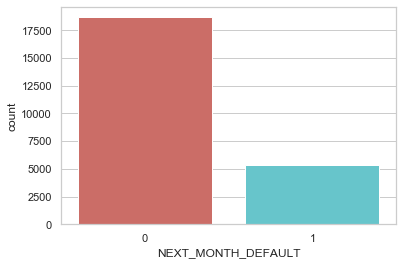

<Figure size 432x288 with 0 Axes>

In [9]:
#Count plot for NEXT MONTH DEFAULT
sns.countplot(x='NEXT_MONTH_DEFAULT', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [56]:
data.groupby('NEXT_MONTH_DEFAULT').mean()

,Client_ID,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC
NEXT_MONTH_DEFAULT,,,,,,,,,,,,,,,,,,,
0,12070.379218,-0.209159,-0.297161,-0.30557,-0.347938,-0.382860,-0.402410,120698.410284,115412.935672,110513.657900,101133.884574,94353.630905,90824.037493,14839.278790,15648.549330,13348.943867,12312.560900,12211.672523,13488.071130
1,11755.726079,0.668668,0.455347,0.35591,0.248218,0.165103,0.114259,112464.222702,109378.238086,104794.528893,97636.900938,91757.125516,88647.583490,7937.380488,7625.417636,7694.211445,7416.694934,7542.545403,8143.887992


In [11]:
data.groupby('Balance_Limit_V1').mean()

,Client_ID,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Balance_Limit_V1,,,,,,,,,,,,,,,,,,,,
1.5M,11909.146749,-0.446397,-0.590510,-0.609842,-0.572056,-0.591388,-0.615114,244730.889279,231407.398067,231938.369069,218778.130053,204323.638840,196002.269772,32942.789982,48434.177504,37372.776801,32493.981547,35018.478032,41993.321617,0.121265
100K-500K,11875.615088,0.144068,0.051677,0.018905,-0.058433,-0.117103,-0.147090,93825.297144,90277.031231,85493.240488,77770.462724,72271.217139,69891.609814,9299.670736,8878.756015,7914.684485,7493.186618,7298.234384,7369.873059,0.254771
1M,12365.319778,-0.378760,-0.554529,-0.572845,-0.590657,-0.604268,-0.621408,164340.946396,157877.443959,151907.884221,140623.460763,132478.605613,126848.820534,20747.975130,21117.448496,18730.841203,17485.857335,17109.165518,20451.984540,0.149555
2.5M,13087.675676,-0.270270,-0.567568,-0.648649,-0.567568,-0.621622,-0.648649,355914.567568,311908.243243,304924.567568,282588.972973,276831.540541,294526.000000,39806.324324,59290.081081,72569.918919,52161.540541,91232.810811,37076.027027,0.081081


In [12]:
data.groupby('EDUCATION_STATUS').mean()

,Client_ID,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
EDUCATION_STATUS,,,,,,,,,,,,,,,,,,,,
Graduate,11739.728710,-0.228120,-0.403279,-0.416372,-0.453763,-0.475230,-0.483251,113599.201345,109427.062397,106439.274003,99329.403987,93868.186011,89653.174098,15737.213848,17164.146025,14898.124794,13427.697452,13330.696862,15151.714555,0.194621
High School,12217.631592,0.136815,0.043057,0.007643,-0.065987,-0.135796,-0.184713,110363.083822,105601.195159,101137.280764,90190.532229,84226.279236,80928.378854,11480.565605,11792.014268,9553.478217,9628.735796,8343.286115,8809.754904,0.251210
Other,12117.649047,0.091058,0.011124,-0.026559,-0.092007,-0.147107,-0.179529,125601.836165,120336.137967,114037.150987,104549.606019,96942.755971,94028.878417,12147.473829,12158.369061,10902.063034,10155.530654,10556.923946,11399.041735,0.232301


In [13]:
data.groupby('Gender').mean()

,Client_ID,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
Gender,,,,,,,,,,,,,,,,,,,,
F,11791.016667,0.061006,-0.032180,-0.067715,-0.135430,-0.191824,-0.230503,126120.609958,120592.629979,114184.884696,104368.974423,96996.341719,93515.033857,13299.439518,13842.945073,12459.042034,11386.335954,11259.491614,12481.516352,0.243396
M,12138.706846,-0.063831,-0.194606,-0.218672,-0.268396,-0.306916,-0.325380,114085.961826,109771.219087,105983.473859,97710.531881,91653.019917,88246.402282,13311.128631,13882.447856,11851.705947,11119.007676,11118.820401,12182.264523,0.208022


In [14]:
data.groupby('MARITAL_STATUS').mean()

,Client_ID,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
MARITAL_STATUS,,,,,,,,,,,,,,,,,,,,
Other,11851.116756,0.004514,-0.103060,-0.124254,-0.183474,-0.228845,-0.259755,114637.853864,110108.160520,104927.776052,96739.540704,89989.544070,87210.505891,12937.766794,13217.436190,11995.709105,10717.936113,11149.615761,12104.308952,0.211477
Single,12179.131199,-0.036597,-0.162306,-0.199817,-0.253888,-0.299817,-0.321043,123930.180878,118813.527905,114404.281702,104683.303751,98305.986002,94083.722598,13747.388930,14643.183989,12209.607594,11831.936962,11204.777219,12536.678225,0.234767


In [15]:
data.groupby('AGE').mean()

,Client_ID,PAY_JULY,PAY_AUG,PAY_SEP,PAY_OCT,PAY_NOV,PAY_DEC,DUE_AMT_JULY,DUE_AMT_AUG,DUE_AMT_SEP,DUE_AMT_OCT,DUE_AMT_NOV,DUE_AMT_DEC,PAID_AMT_JULY,PAID_AMT_AUG,PAID_AMT_SEP,PAID_AMT_OCT,PAID_AMT_NOV,PAID_AMT_DEC,NEXT_MONTH_DEFAULT
AGE,,,,,,,,,,,,,,,,,,,,
31-45,12147.798499,-0.096833,-0.231359,-0.257588,-0.306664,-0.350957,-0.367618,126555.741422,121537.708595,116901.767651,107984.983174,101239.537776,97231.576048,14631.559469,16176.696305,13584.711069,12792.978307,12390.961811,14214.700924,0.208265
46-65,12034.594217,-0.010120,-0.121928,-0.141446,-0.199759,-0.260964,-0.295663,125080.628675,119403.228916,114253.218795,103056.428193,95581.724096,91770.633253,13465.057590,13725.637590,12473.636627,11403.380000,11118.260000,11871.646988,0.246024
Less than 30,11754.893951,0.114821,0.027625,-0.008903,-0.077900,-0.118225,-0.157502,102409.464127,98487.037183,93590.163132,85906.802042,80086.699398,77704.714585,11011.100550,10319.096884,9470.010343,8630.088243,9151.984944,9487.644279,0.230558
More than 65,11416.420455,-0.022727,-0.238636,-0.340909,-0.352273,-0.306818,-0.193182,195724.113636,186988.056818,176537.238636,176409.545455,168786.897727,170273.113636,22497.397727,10192.818182,16322.284091,12088.477273,21841.272727,13138.806818,0.261364


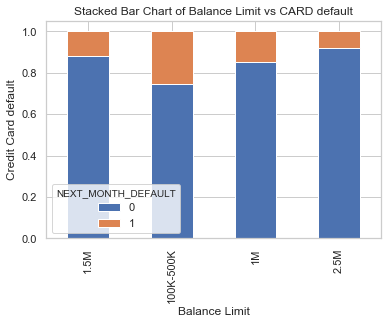

In [16]:
table=pd.crosstab(data.Balance_Limit_V1,data.NEXT_MONTH_DEFAULT)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Balance Limit vs CARD default')
plt.xlabel('Balance Limit')
plt.ylabel('Credit Card default')
plt.savefig('Balance Limit vs card default')

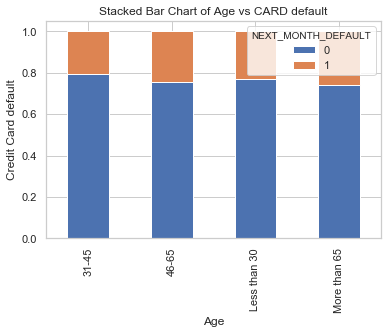

In [17]:
table=pd.crosstab(data.AGE,data.NEXT_MONTH_DEFAULT)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Age vs CARD default')
plt.xlabel('Age')
plt.ylabel('Credit Card default')
plt.savefig('Age vs card default')

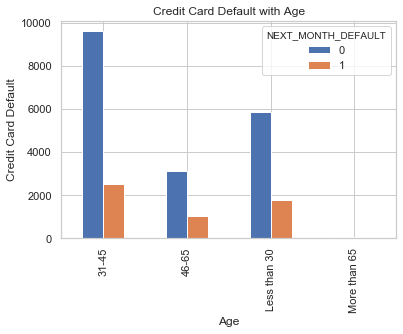

In [18]:
%matplotlib inline
pd.crosstab(data.AGE,data.NEXT_MONTH_DEFAULT).plot(kind='bar')
plt.title('Credit Card Default with Age')
plt.xlabel('Age')
plt.ylabel('Credit Card Default')
plt.savefig('credit_card_default with age')
#Graph to analyze the credit card default with age

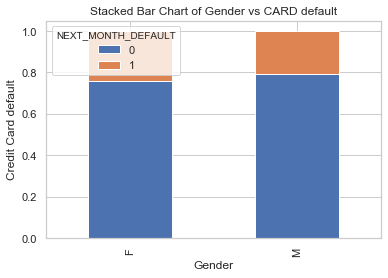

In [19]:
table=pd.crosstab(data.Gender,data.NEXT_MONTH_DEFAULT)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Gender vs CARD default')
plt.xlabel('Gender')
plt.ylabel('Credit Card default')
plt.savefig('Gender vs card default')

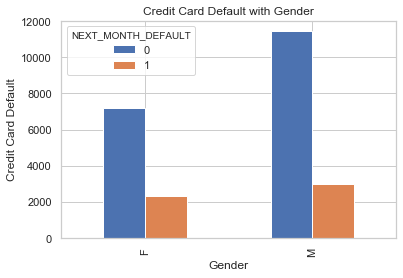

In [20]:
%matplotlib inline
pd.crosstab(data.Gender,data.NEXT_MONTH_DEFAULT).plot(kind='bar')
plt.title('Credit Card Default with Gender')
plt.xlabel('Gender')
plt.ylabel('Credit Card Default')
plt.savefig('credit_card_default with gender')
#credit card default with gender

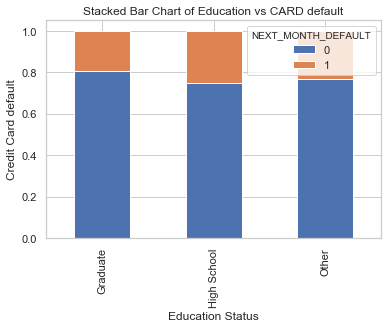

In [21]:
table=pd.crosstab(data.EDUCATION_STATUS,data.NEXT_MONTH_DEFAULT)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Education vs CARD default')
plt.xlabel('Education Status')
plt.ylabel('Credit Card default')
plt.savefig('education vs card default')

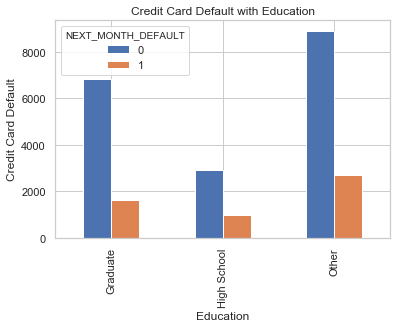

In [22]:
%matplotlib inline
pd.crosstab(data.EDUCATION_STATUS,data.NEXT_MONTH_DEFAULT).plot(kind='bar')
plt.title('Credit Card Default with Education')
plt.xlabel('Education')
plt.ylabel('Credit Card Default')
plt.savefig('credit_card_default with education')
#credit card default with education

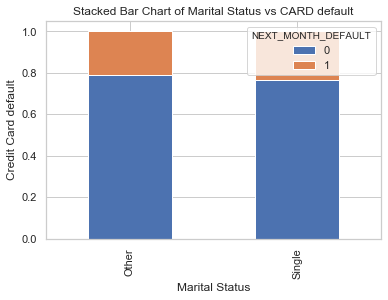

In [23]:
table=pd.crosstab(data.MARITAL_STATUS,data.NEXT_MONTH_DEFAULT)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs CARD default')
plt.xlabel('Marital Status')
plt.ylabel('Credit Card default')
plt.savefig('mariral_vs card default')

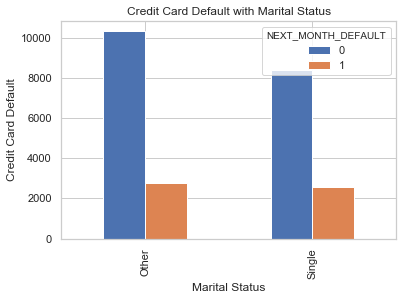

In [24]:
%matplotlib inline
pd.crosstab(data.MARITAL_STATUS,data.NEXT_MONTH_DEFAULT).plot(kind='bar')
plt.title('Credit Card Default with Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Credit Card Default')
plt.savefig('credit_card_default with marital status')
#Credit card default with marital status

In [57]:
#Creating dummy varibales
cat_vars=['Balance_Limit_V1', 'Gender', 'AGE', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [58]:
cat_vars=['Balance_Limit_V1', 'Gender', 'AGE', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [59]:
#displaying dummy variables
data_final=data[to_keep]
del data_final['Client_ID']
data_final.columns.values

array(['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG',
       'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC',
       'NEXT_MONTH_DEFAULT', 'Balance_Limit_V1_1.5M',
       'Balance_Limit_V1_100K-500K', 'Balance_Limit_V1_1M',
       'Balance_Limit_V1_2.5M', 'Gender_F', 'Gender_M', 'AGE_31-45',
       'AGE_46-65', 'AGE_Less than 30', 'AGE_More than 65',
       'EDUCATION_STATUS_Graduate', 'EDUCATION_STATUS_High School',
       'EDUCATION_STATUS_Other', 'MARITAL_STATUS_Other',
       'MARITAL_STATUS_Single', 'PAY_JULY_-2', 'PAY_JULY_-1',
       'PAY_JULY_0', 'PAY_JULY_1', 'PAY_JULY_2', 'PAY_JULY_3',
       'PAY_JULY_4', 'PAY_JULY_5', 'PAY_JULY_6', 'PAY_JULY_7',
       'PAY_JULY_8', 'PAY_AUG_-2', 'PAY_AUG_-1', 'PAY_AUG_0', 'PAY_AUG_1',
       'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4', 'PAY_AUG_5', 'PAY_AUG_6',
       'PAY_AUG_7', 'PAY_AUG_8', 'PAY_SEP_-2', 'PAY_SEP_-1', 'PAY_SEP_0',
       'PAY_SE

In [28]:
#selecting x and y variables
data_final_vars=data_final.columns.values.tolist()
y=['NEXT_MONTH_DEFAULT']
X=[i for i in data_final_vars if i not in y]

In [29]:
#analyzing the variables that won't affect the model
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

rfe = RFE(logreg, 24)
rfe = rfe.fit(data_final[X], data_final[y] )
print(rfe.support_)
print(rfe.ranking_)

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this wa

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

[ True  True  True  True  True  True  True  True  True  True  True  True
 False  True False False False  True  True False False False  True False
  True  True False False False  True False False False False False False
 False False False False  True False False False False False False False
 False False False  True False False False False False False False False
 False False  True False False False False False False False False False
 False  True False False False False False False False False False  True
 False False False False False False False]
[ 1  1  1  1  1  1  1  1  1  1  1  1 28  1  8 48  5  1  1 24  3 47  1 23
  1  1  2 19 13  1 26  4 27 34 52 49 55 57 17  7  1 58 18 29 44 45 53 51
 60 14  9  1 64 20 32 40 63 50 43 67 11 12  1 56 21 30 39 66 65 36 68 10
 15  1 22 33 37 46 62 35 61  6 16  1 25 31 41 59 42 38 54]


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [30]:
#selecting X with the variables that are going to used for training
cols=['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC',
     'Balance_Limit_V1_1.5M','Gender_F', 'Gender_M','AGE_More than 65', 'EDUCATION_STATUS_High School', 'EDUCATION_STATUS_Other', 'PAY_JULY_-1', 'PAY_AUG_-1','PAY_SEP_-1', 'PAY_OCT_-1', 'PAY_NOV_-1', 'PAY_DEC_-1'] 
X=data_final[cols]
y=data_final['NEXT_MONTH_DEFAULT']

In [31]:
#building a model
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.511267
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:     NEXT_MONTH_DEFAULT   No. Observations:                24000
Model:                          Logit   Df Residuals:                    23976
Method:                           MLE   Df Model:                           23
Date:                Mon, 17 Feb 2020   Pseudo R-squ.:                 0.03449
Time:                        04:10:45   Log-Likelihood:                -12270.
converged:                       True   LL-Null:                       -12709.
Covariance Type:            nonrobust   LLR p-value:                1.986e-170
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
DUE_AMT_JULY                 -3.722e-06   5.66e-07     -6.570      0.000

In [32]:
#training the model with train and test data obtained from the train csv file
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [63]:
test_cat_vars=['Balance_Limit_V1', 'Gender', 'AGE', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
for var in test_cat_vars:
    test_cat_list='var'+'_'+var
    test_cat_list = pd.get_dummies(test_data[var], prefix=var)
    test_data1=test_data.join(test_cat_list)
    test_data=test_data1

ValueError: columns overlap but no suffix specified: Index(['Balance_Limit_V1_ 500K', 'Balance_Limit_V1_1.5M',
       'Balance_Limit_V1_100K', 'Balance_Limit_V1_1M', 'Balance_Limit_V1_2.5M',
       'Balance_Limit_V1_200K', 'Balance_Limit_V1_300K',
       'Balance_Limit_V1_400K'],
      dtype='object')

In [66]:
test_cat_vars=['Balance_Limit_V1', 'Gender', 'AGE', 'EDUCATION_STATUS', 'MARITAL_STATUS', 'PAY_JULY', 'PAY_AUG', 'PAY_SEP', 'PAY_OCT', 'PAY_NOV', 'PAY_DEC']
test_data_vars=test_data.columns.values.tolist()
to_keep=[i for i in test_data_vars if i not in test_cat_vars]

In [68]:
test_data_final=test_data[to_keep]
del test_data_final['Client_ID']
test_data_final.columns.values

array(['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT',
       'DUE_AMT_NOV', 'DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG',
       'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC',
       'Balance_Limit_V1_ 500K', 'Balance_Limit_V1_1.5M',
       'Balance_Limit_V1_100K', 'Balance_Limit_V1_1M',
       'Balance_Limit_V1_2.5M', 'Balance_Limit_V1_200K',
       'Balance_Limit_V1_300K', 'Balance_Limit_V1_400K', 'Gender_F',
       'Gender_M', 'AGE_31-45', 'AGE_46-65', 'AGE_Less than 30',
       'AGE_More than 65', 'EDUCATION_STATUS_Graduate',
       'EDUCATION_STATUS_High School', 'EDUCATION_STATUS_Other',
       'MARITAL_STATUS_Other', 'MARITAL_STATUS_Single', 'PAY_JULY_-2',
       'PAY_JULY_-1', 'PAY_JULY_0', 'PAY_JULY_1', 'PAY_JULY_2',
       'PAY_JULY_3', 'PAY_JULY_4', 'PAY_JULY_5', 'PAY_JULY_6',
       'PAY_JULY_7', 'PAY_JULY_8', 'PAY_AUG_-2', 'PAY_AUG_-1',
       'PAY_AUG_0', 'PAY_AUG_1', 'PAY_AUG_2', 'PAY_AUG_3', 'PAY_AUG_4',
       'PAY_AUG_5', 'PAY_AUG_6', 

In [69]:
test_data_final_vars=test_data_final.columns.values.tolist()
test_X=[i for i in test_data_final_vars if i not in y]

In [70]:
test_cols=['DUE_AMT_JULY', 'DUE_AMT_AUG', 'DUE_AMT_SEP', 'DUE_AMT_OCT','DUE_AMT_NOV','DUE_AMT_DEC', 'PAID_AMT_JULY', 'PAID_AMT_AUG', 'PAID_AMT_SEP', 'PAID_AMT_OCT', 'PAID_AMT_NOV', 'PAID_AMT_DEC',
     'Balance_Limit_V1_1.5M','Gender_F', 'Gender_M','AGE_More than 65', 'EDUCATION_STATUS_High School', 'EDUCATION_STATUS_Other', 'PAY_JULY_-1', 'PAY_AUG_-1','PAY_SEP_-1', 'PAY_OCT_-1', 'PAY_NOV_-1', 'PAY_DEC_-1'] 
test_X=test_data_final[test_cols]
len(test_X)

6000

In [71]:
#predicting the test set results
y_pred = logreg.predict(X_test)

In [72]:
#calculating the accuracy
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [74]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Anaconda\lib\site-packages\sklea

10-fold cross validation average accuracy: 0.781


C:\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [75]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

#the below results states that
#we have 928+3 correct results
#we have 264+5 incorrect results

[[928   3]
 [264   5]]


In [76]:
#computing precision, f-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      1.00      0.87       931
           1       0.62      0.02      0.04       269

    accuracy                           0.78      1200
   macro avg       0.70      0.51      0.46      1200
weighted avg       0.74      0.78      0.69      1200



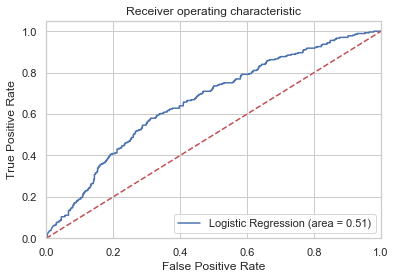

In [77]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [78]:
import joblib
filename = 'finalized_SVM_model.sav'
joblib.dump(logreg, filename)

['finalized_SVM_model.sav']

In [87]:
#to test the test.csv file
loaded_model = joblib.load(filename)

predictions = loaded_model.predict(test_X)
res = pd.DataFrame(predictions)
res.index = test_X.index # its important for comparison
res.columns = ["prediction"]
res.to_csv("prediction_results.csv")